In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
y = data['label']
X = data.drop('label', axis=1)

In [5]:
X.shape

(42000, 784)

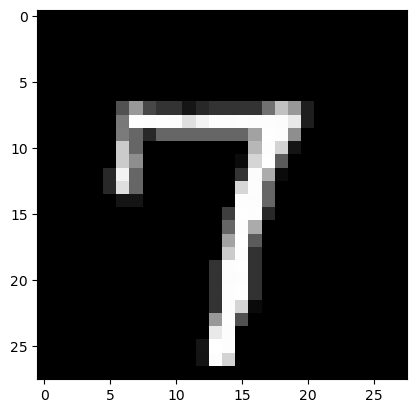

In [14]:
img = X.iloc[6].values.reshape(28,28)
plt.imshow(img, cmap='gray')

In [16]:
y.value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

* Classification on grayscale data
* Classification on greyscale and PCA
* Classification on binay images
* Classification on binay images with PCA
* Classification using LDA

In [17]:
X.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [18]:
X.shape

(42000, 784)

In [19]:
X_sample = X.sample(10000)
y_sample = y.iloc[X_sample.index]

In [20]:
y_sample.value_counts()

label
1    1144
3    1081
7    1035
4     999
0     983
9     980
2     973
6     950
8     943
5     912
Name: count, dtype: int64

### Use Case - 1

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_sample, y_sample, test_size=0.3)

In [22]:
train_X.shape, test_X.shape, train_y.shape, test_y .shape

((7000, 784), (3000, 784), (7000,), (3000,))

In [23]:
import time
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [72]:
clf = SVC()
train_scores = list()
test_score = list()
fit_time = list()
score_time = list()

## Use Case 1

In [73]:
start_time = time.time()
clf.fit(train_X, train_y)
fittime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
fit_time.append(fittime)
start_time = time.time()
train_acc = clf.score(train_X, train_y)
test_acc = clf.score(test_X, test_y)
scoretime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
score_time.append(scoretime)
train_scores.append(train_acc)
test_score.append(test_acc)
print("Accuracy for grayscale: ",test_acc)

Time consumed to fit clf:  00:00:02
Time consumed to fit clf:  00:00:06
Accuracy for grayscale:  0.954


## Use Case 2

In [74]:
from sklearn.decomposition import PCA

In [75]:
dim_re = PCA()
dim_re.fit(X_sample)

PCA()

In [76]:
dim_re.explained_variance_ratio_

array([9.72931235e-02, 7.21537633e-02, 6.08575691e-02, 5.44705965e-02,
       4.88918317e-02, 4.21924736e-02, 3.24269547e-02, 2.91877385e-02,
       2.71705942e-02, 2.42484009e-02, 2.09386292e-02, 2.07253010e-02,
       1.74550320e-02, 1.70004088e-02, 1.61877465e-02, 1.47858736e-02,
       1.29156054e-02, 1.27532699e-02, 1.21189751e-02, 1.18382968e-02,
       1.06289495e-02, 1.03228505e-02, 9.69657490e-03, 9.09194546e-03,
       8.93574814e-03, 8.35919339e-03, 8.12278964e-03, 7.89519650e-03,
       7.43313541e-03, 6.85518256e-03, 6.61767200e-03, 6.34635335e-03,
       5.94572870e-03, 5.92347916e-03, 5.53640431e-03, 5.40585847e-03,
       5.03803294e-03, 4.87169474e-03, 4.75680145e-03, 4.66932942e-03,
       4.48227303e-03, 4.41490259e-03, 4.14137872e-03, 4.01317115e-03,
       3.96095048e-03, 3.78488549e-03, 3.64519452e-03, 3.46655141e-03,
       3.41336911e-03, 3.21621032e-03, 3.13254747e-03, 3.09714275e-03,
       2.97522424e-03, 2.90712419e-03, 2.82935779e-03, 2.72645311e-03,
      

In [77]:
import seaborn as sns

Text(0, 0.5, 'Explained Variance Percentage')

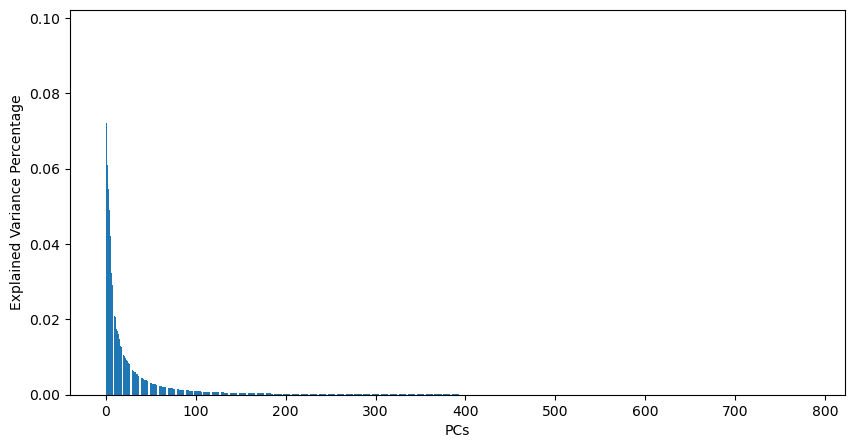

In [78]:
plt.figure(figsize=(10,5))
plt.bar(x=range(784), height=dim_re.explained_variance_ratio_)
plt.xlabel('PCs')
plt.ylabel('Explained Variance Percentage')

Text(0, 0.5, 'Explained Variance Percentage')

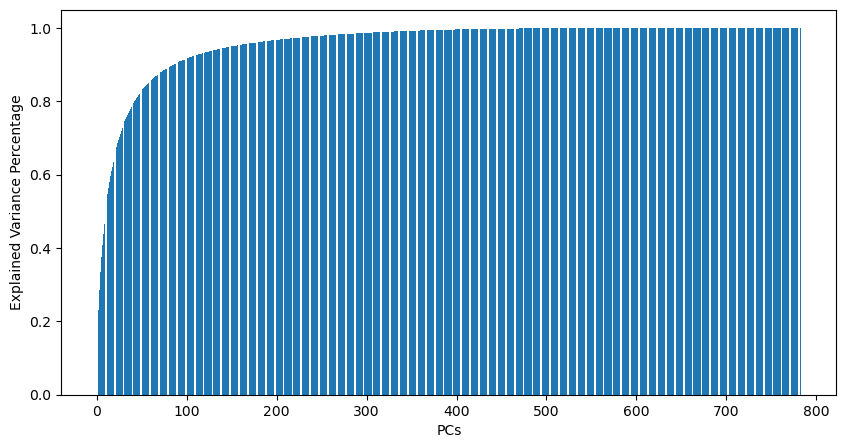

In [79]:
plt.figure(figsize=(10,5))
plt.bar(x=range(784), height=dim_re.explained_variance_ratio_.cumsum())
plt.xlabel('PCs')
plt.ylabel('Explained Variance Percentage')

In [80]:
var = dim_re.explained_variance_ratio_.cumsum()

In [81]:
var[var <= 0.95].shape

(150,)

In [82]:
dim_re = PCA(n_components=150)
X_trf = dim_re.fit_transform(X_sample)
X_trf.shape

(10000, 150)

In [83]:
train_X, test_X, train_y, test_y = train_test_split(X_trf, y_sample, test_size=0.3)

In [84]:
start_time = time.time()
clf.fit(train_X, train_y)
fittime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
fit_time.append(fittime)
start_time = time.time()
train_acc = clf.score(train_X, train_y)
test_acc = clf.score(test_X, test_y)
scoretime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
score_time.append(scoretime)
train_scores.append(train_acc)
test_score.append(test_acc)
print("Accuracy for grayscale: ",test_acc)

Time consumed to fit clf:  00:00:01
Time consumed to fit clf:  00:00:04
Accuracy for grayscale:  0.9646666666666667


## Use Case 3 

In [85]:
X_binary = X_sample.copy()
X_binary[X_binary > 0] = 1

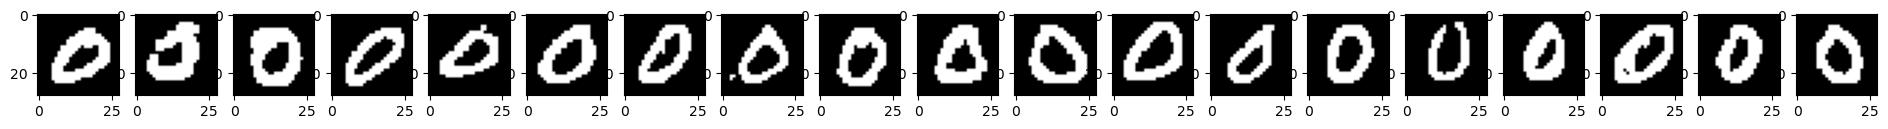

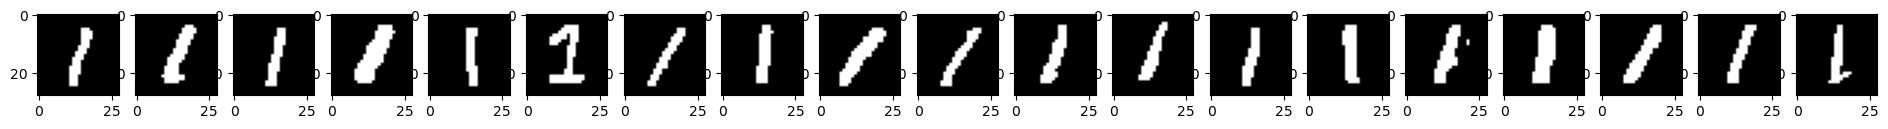

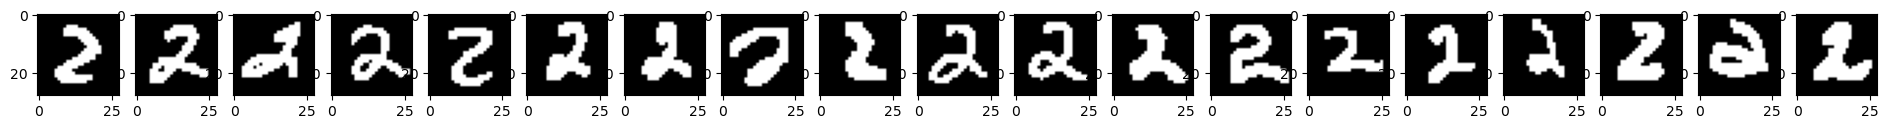

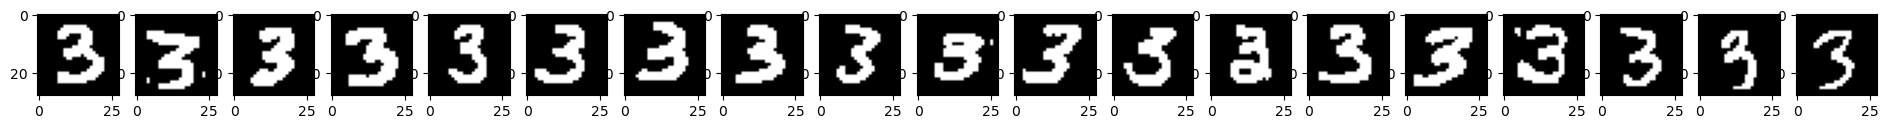

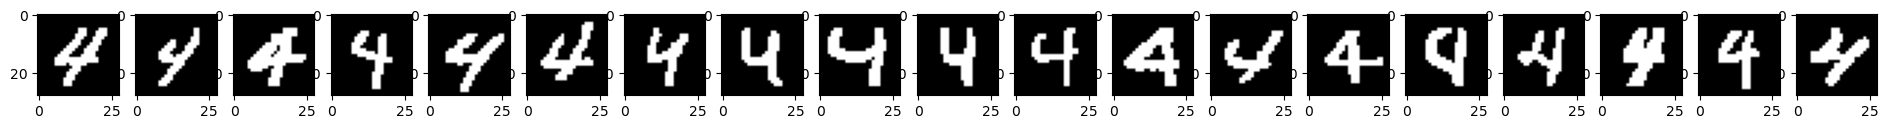

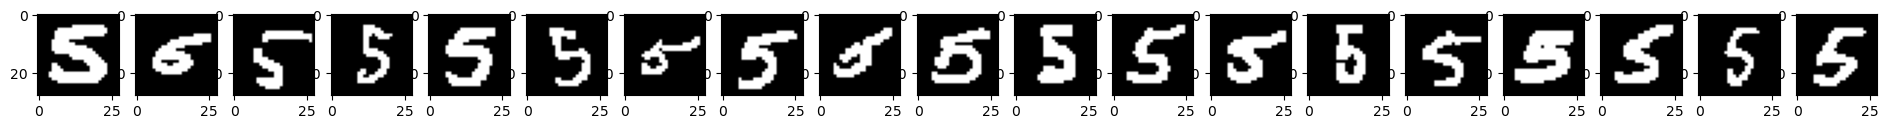

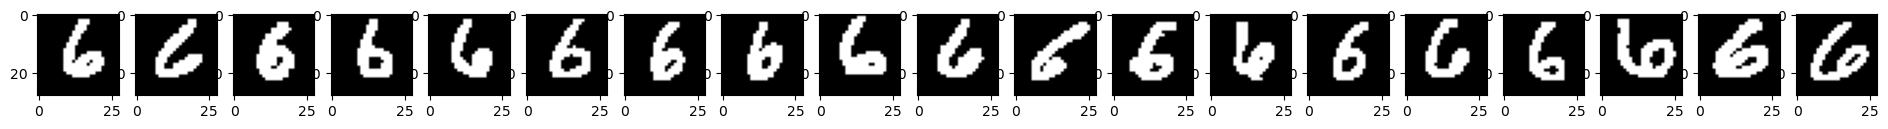

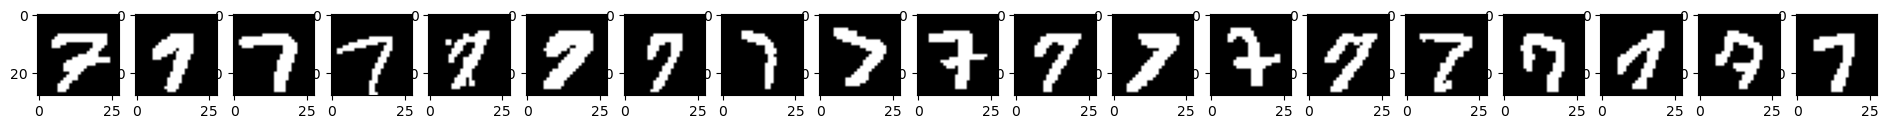

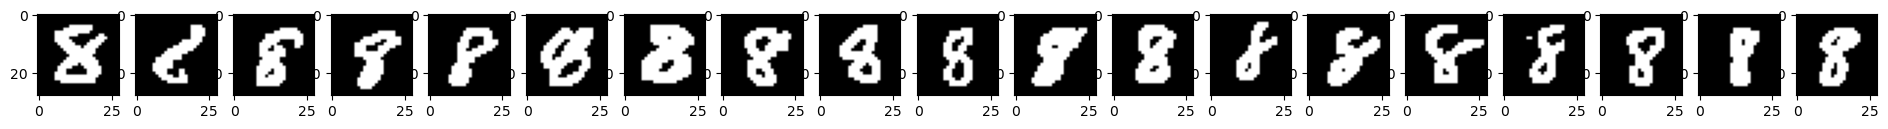

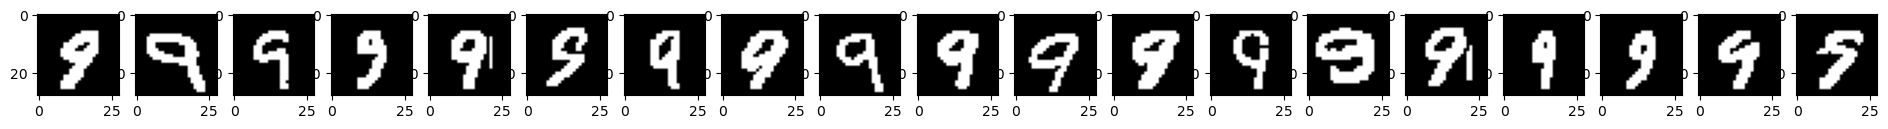

In [86]:
for x in range(10):
    images = X_binary[y_sample==x]
    images_new = list()
    for ids in images.index:
        img = images.loc[ids].values.reshape(28,28)
        images_new.append(img)
    plt.figure(figsize=(25,25))
    for i in range(1, 20):
        ax = plt.subplot(1, 20, i)
        ax.imshow(images_new[i], cmap='gray')

In [87]:
train_X, test_X, train_y, test_y = train_test_split(X_binary, y_sample, test_size=0.3)

In [88]:
start_time = time.time()
clf.fit(train_X, train_y)
fittime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
fit_time.append(fittime)
start_time = time.time()
train_acc = clf.score(train_X, train_y)
test_acc = clf.score(test_X, test_y)
scoretime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
score_time.append(scoretime)
train_scores.append(train_acc)
test_score.append(test_acc)
print("Accuracy for grayscale: ",test_acc)

Time consumed to fit clf:  00:00:06
Time consumed to fit clf:  00:00:17
Accuracy for grayscale:  0.949


## Use Case 4

Text(0, 0.5, 'Explained Variance Percentage')

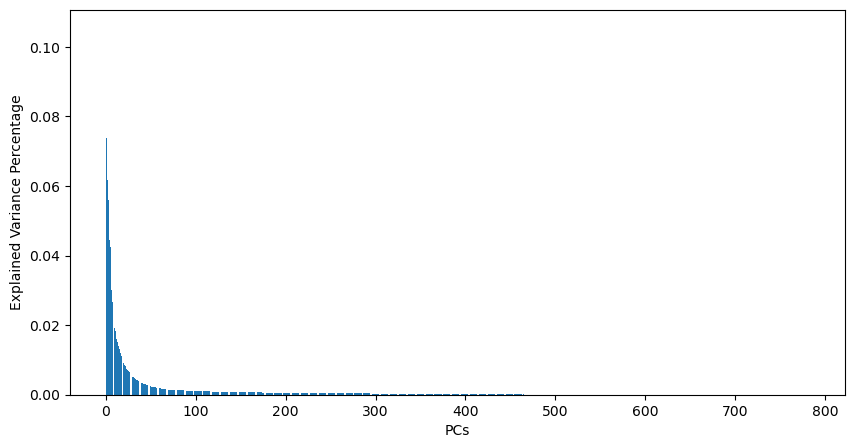

In [89]:
dim_re = PCA()
dim_re.fit(X_binary)

plt.figure(figsize=(10,5))
plt.bar(x=range(784), height=dim_re.explained_variance_ratio_)
plt.xlabel('PCs')
plt.ylabel('Explained Variance Percentage')

Text(0, 0.5, 'Explained Variance Percentage')

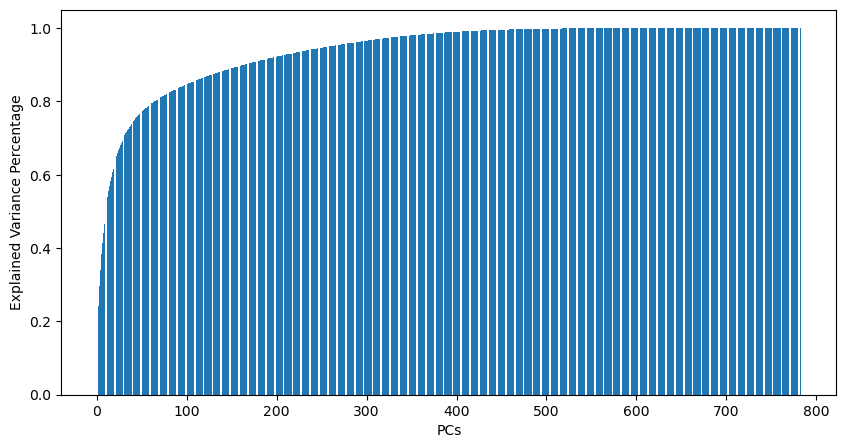

In [90]:
plt.figure(figsize=(10,5))
plt.bar(x=range(784), height=dim_re.explained_variance_ratio_.cumsum())
plt.xlabel('PCs')
plt.ylabel('Explained Variance Percentage')

In [91]:
var = dim_re.explained_variance_ratio_.cumsum()

In [92]:
var[var <= 0.95].shape

(259,)

In [93]:
dim_re = PCA(n_components=259)
X_trf = dim_re.fit_transform(X_binary)
X_trf.shape

(10000, 259)

In [94]:
train_X, test_X, train_y, test_y = train_test_split(X_trf, y_sample, test_size=0.3)

In [95]:
start_time = time.time()
clf.fit(train_X, train_y)
fittime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
fit_time.append(fittime)
start_time = time.time()
train_acc = clf.score(train_X, train_y)
test_acc = clf.score(test_X, test_y)
scoretime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
score_time.append(scoretime)
train_scores.append(train_acc)
test_score.append(test_acc)
print("Accuracy for grayscale: ",test_acc)

Time consumed to fit clf:  00:00:02
Time consumed to fit clf:  00:00:06
Accuracy for grayscale:  0.961


In [96]:
case1 = [fit_time[0], score_time[0], train_scores[0], test_score[0]]
case2 = [fit_time[1], score_time[1], train_scores[1], test_score[1]]
case3 = [fit_time[2], score_time[2], train_scores[2], test_score[2]]
case4 = [fit_time[3], score_time[3], train_scores[3], test_score[3]]

In [101]:
head = ['Fit Time', 'Score Time', 'Train Acc', 'Test Acc']
print('\t\tCase1\t\t\tCase2\t\t\tCase3\t\t\tCase4')
for h, c1, c2, c3, c4 in zip(head, case1, case2, case3, case4):
    print('{}\t{}\t{}\t{}\t{}'.format(h, c1, c2, c3, c4))

		Case1			Case2			Case3			Case4
Fit Time	2.258976936340332	1.396359920501709	6.228492975234985	2.437074899673462
Score Time	6.886000871658325	4.393533229827881	17.876327991485596	6.798069000244141
Train Acc	0.9917142857142857	0.9922857142857143	0.9825714285714285	0.9921428571428571
Test Acc	0.954	0.9646666666666667	0.949	0.961


## Linear Discriminant Analysis

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
lda = LinearDiscriminantAnalysis()
X_trf = lda.fit_transform(X_sample, y_sample)

In [104]:
X_trf.shape

(10000, 9)

In [105]:
train_X, test_X, train_y, test_y = train_test_split(X_trf, y_sample, test_size=0.3)

In [106]:
start_time = time.time()
clf.fit(train_X, train_y)
fittime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
fit_time.append(fittime)
start_time = time.time()
train_acc = clf.score(train_X, train_y)
test_acc = clf.score(test_X, test_y)
scoretime = time.time() - start_time
print("Time consumed to fit clf: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
score_time.append(scoretime)
train_scores.append(train_acc)
test_score.append(test_acc)
print("Accuracy for grayscale: ",test_acc)

Time consumed to fit clf:  00:00:00
Time consumed to fit clf:  00:00:00
Accuracy for grayscale:  0.917


## Hyper-parameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = {
    'C': [0.01, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [110]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3, verbose=2)
grid.fit(X_trf, y_sample)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ....................................C=0.01, gamma=1; total time=   2.4s
[CV] END ....................................C=0.01, gamma=1; total time=   2.3s
[CV] END ....................................C=0.01, gamma=1; total time=   2.3s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.6s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.6s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.6s
[CV] END .................................C=0.01, gamma=0.01; total time=   1.7s
[CV] END .................................C=0.01, gamma=0.01; total time=   1.7s
[CV] END .................................C=0.01, gamma=0.01; total time=   1.7s
[CV] END ................................C=0.01, gamma=0.001; total time=   2.2s
[CV] END ................................C=0.01, gamma=0.001; total time=   2.2s
[CV] END ................................C=0.01,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [111]:
grid.score(test_X, test_y)

0.95

In [112]:
best_estimator = grid.best_estimator_

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [116]:
lda = LinearDiscriminantAnalysis()
X_trf = lda.fit_transform(X, y)

In [117]:
X_trf.shape

(42000, 9)

In [119]:
train_X, test_X, train_y, test_y = train_test_split(X_trf, y, test_size=0.3)

In [120]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((29400, 9), (12600, 9), (29400,), (12600,))

In [121]:
from tqdm import tqdm

fit_time = list()
score = list()
score_time = list()

for i in tqdm(range(1000,31000,5000)):
    start_time = time.time()
    best_estimator.fit(train_X[:i], train_y[:i])
    fit_time.append(time.time() - start_time)
    
    start_time = time.time()
    score.append(best_estimator.score(test_X, test_y))
    score_time.append(time.time() - start_time)

100%|███████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.66s/it]


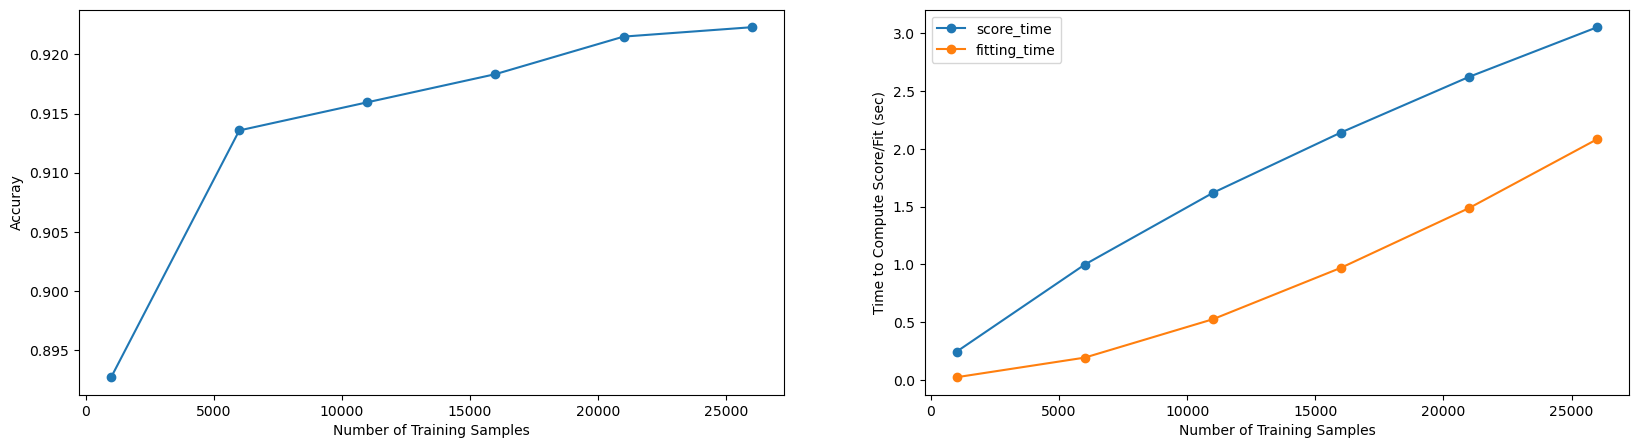

In [124]:
x=list(range(1000,31000,5000))
plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,2,1)
ax1.plot(x, score, '-o')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuray')
ax2=plt.subplot(1, 2,2)
ax2.plot(x,score_time,'-o');
ax2.plot(x,fit_time,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Time to Compute Score/Fit (sec)')
plt.legend(['score_time','fitting_time']);